In [348]:
!pipenv install opencv-python pyautogui Pillow mss

Installing opencv-python...
Resolving opencv-python...
✔ Installation Succeeded
⠋ Installing opencv-python...
Installing pyautogui...
Resolving pyautogui...
✔ Installation Succeeded
⠋ Installing pyautogui...
Installing Pillow...
Resolving Pillow...
✔ Installation Succeeded
⠋ Installing Pillow...
Installing mss...
Resolving mss...
✔ Installation Succeeded
⠋ Installing mss...
Installing dependencies from Pipfile.lock (ecc4ce)...


In [349]:
import cv2
import numpy as np
import pyautogui
import os
import subprocess
import time
from mss import mss
from PIL import Image
from IPython.display import display

In [350]:
lure_icon = cv2.imread('lure_icon.png', cv2.IMREAD_UNCHANGED)
lure_icon = cv2.resize(lure_icon, (int(lure_icon.shape[1] / 2), int(lure_icon.shape[0] / 2)))

In [351]:
screen_size = pyautogui.size()
screen_size

Size(width=1512, height=982)

In [352]:
sct = mss()

In [353]:
command = 'osascript -e \'tell application "System Events" to get name of application processes whose frontmost is true\''

def is_warcraft():
    return 'Warcraft' in subprocess.run(command, shell=True, capture_output=True, text=True).stdout

while not is_warcraft():
    time.sleep(1)

In [354]:
monitor = sct.monitors[1]
screen_img = np.array(sct.grab(monitor))
screen_img = cv2.resize(screen_img, (int(screen_size.width), int(screen_size.height)))

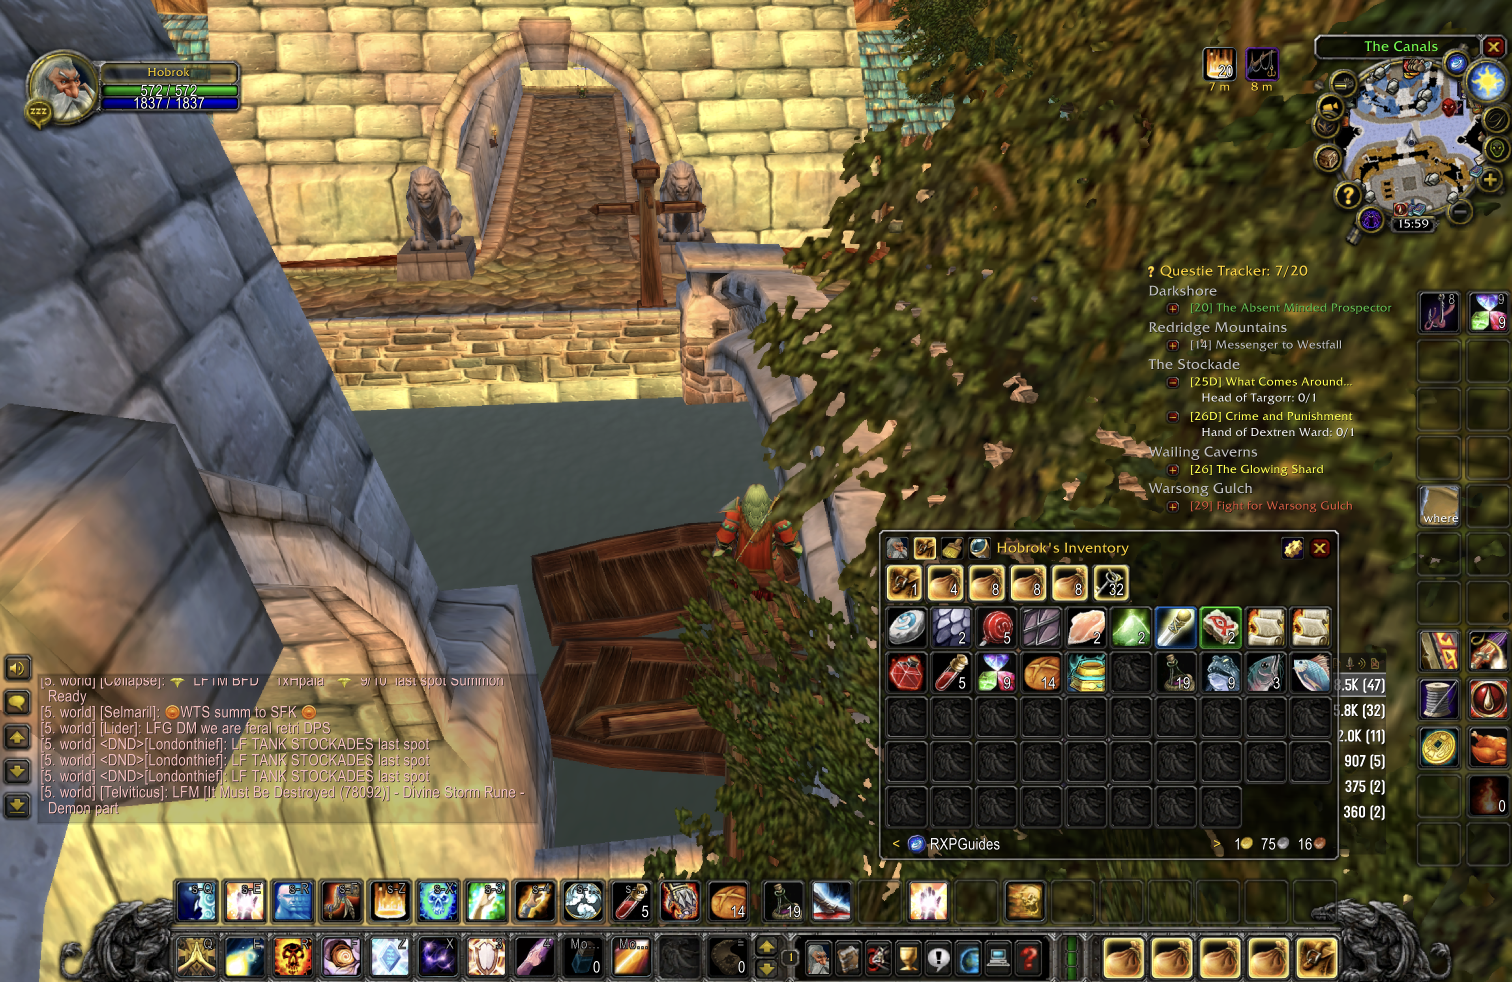

In [355]:
display(Image.fromarray(cv2.cvtColor(screen_img, cv2.COLOR_BGR2RGB)))

In [356]:
# have to reshape to a 2D array (currently 1D)
height, width = screen_img.shape[:2]
image_2d = screen_img.reshape((height, width, 4))
(height, width, 4)

(982, 1512, 4)

In [357]:
buff_top=20
buff_left=800
buff_right=1300
buff_bottom=180
buff_image = screen_img[buff_top:buff_bottom, buff_left:buff_right]
buff_image.shape[:2]

(160, 500)

In [358]:
cv2.rectangle(screen_img, (buff_left, buff_top), (buff_right, buff_bottom), (255, 0, 0), 2)
''

''

In [359]:
w = lure_icon.shape[1]
h = lure_icon.shape[0]

In [360]:
res = cv2.matchTemplate(buff_image, lure_icon, cv2.TM_CCOEFF_NORMED)
threshold = .8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # Switch columns and rows
    a = (buff_left + pt[0], buff_top + pt[1])
    b = (buff_left + pt[0] + w, buff_top + pt[1] + h)
    cv2.rectangle(screen_img, a, b, (0, 0, 255), 2)

(1252, 51) (475, 56)
(1252, 52) (475, 57)


In [366]:
print('Couldn\'t found' if len(loc) == 0 else 'Found')

Found


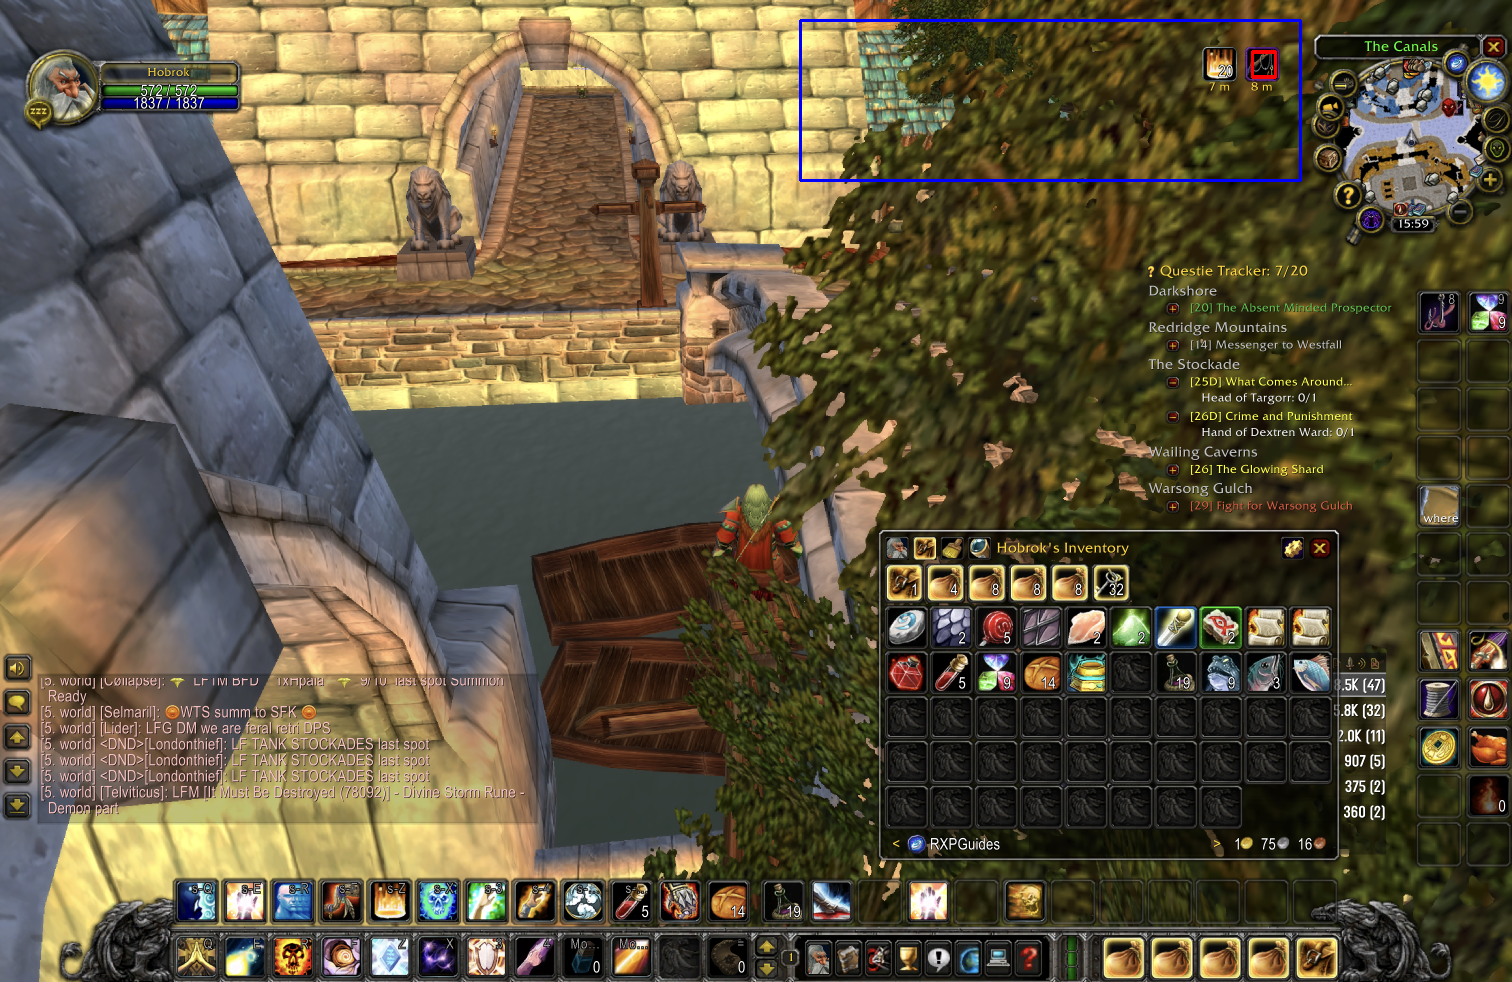

In [361]:
display(Image.fromarray(cv2.cvtColor(screen_img, cv2.COLOR_BGR2RGB)))